## *Marianne Trujillo Altamirano*
### *04/05/23*
# **A06**

# Actividad - Ecuaciones diferenciales

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [1]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
x0 = np.array([0.20])
t_span = [0, 10]

def fun(t, x) :
    return x/(t+1)

sol = solve_ivp(fun, t_span, x0, max_step= 0.1)

Grafique con condición inicial $x_0 = 2$

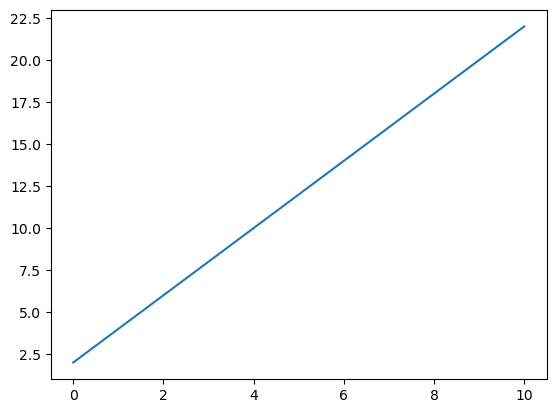

In [5]:
x0 = np.array([2])
t_span = [0, 10]

sol2 = solve_ivp(fun, t_span, x0, max_step= 0.1)
plt.figure()
plt.plot(sol2.t, sol2.y[0])

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [13]:
def dx(t, X): 
    x = X[0]
    dx = X[1]
    return np.array([dx, -w0**2*x])

In [24]:
X0 = [posicion(0, 3, 0.5, 0.1), velocidad(0)]
sol_pend = solve_ivp(dx,tspan, X0, max_step=0.1)

Grafique

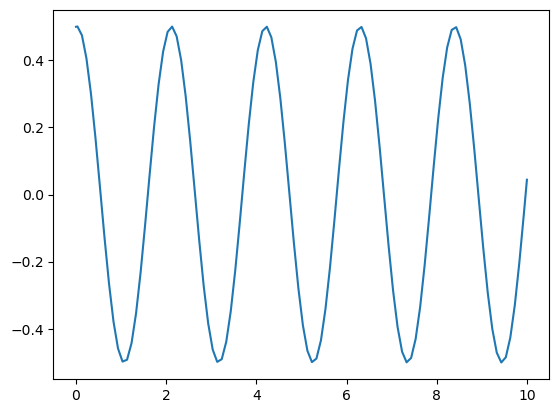

In [26]:
plt.figure()
plt.plot(sol_pend.t, sol_pend.y[0, :])

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [ ]:
th0 = 0.5
v0 = 0.1
w0 = 3

def posicion(t, w0, th0, v0):
    A = th0
    B = v0/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t):
    A = th0
    B = v0/w0
    return w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [60]:
def grafica(t, w0, th0, v0):
    plt.plot(sol_pend.t, posicion(sol_pend.t, w0, th0, v0), label="Solución analítica")

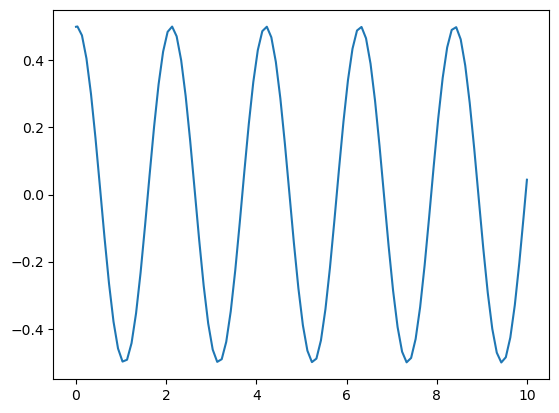

In [61]:
grafica(1, 3, 0.5, 0.1)

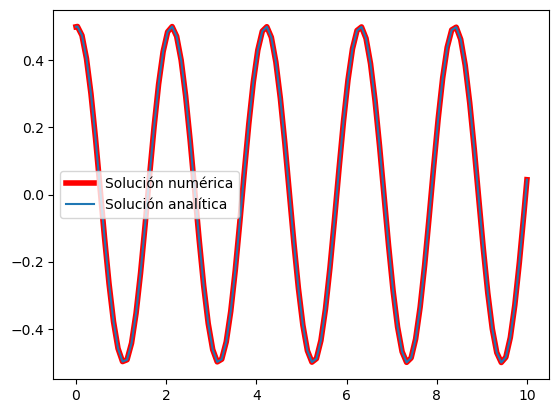

In [62]:
plt.figure()
plt.plot(sol_pend.t, sol_pend.y[0], "r", lw=4, label="Solución numérica")
grafica(1, 3, 0.5, 0.1)
plt.legend()